# Equações de Friedmann sem perturbações

Primeiro vamos explorar ao máximo as equações de Friedmann, para o modelo $\Lambda CDM$ em um universo plano ($k = 0$). As equações são:

$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G \rho}{3}  $$ 

$$ \dot{\rho} + 3 \frac{\dot{a}}{a} (\rho + P)=0 $$

$$ \frac{\ddot a}{a} = -\frac{4 \pi G}{3}\left(\rho + \frac{3p}{c^2}\right) $$ 





A densidade de energia para o modelo $\Lambda CDM$, com $k \approx 0$, é distribuida da segunte forma:

$$ \Omega_m + \Omega_r + \Omega_\Lambda = 1 $$

$$ \Omega_m = 0.3089 \pm 0.0062, \Omega_r \approx 10^{-5}, \Omega_\Lambda = 0.6911 \pm 0.0062 $$

$$ \Omega_i = \frac{\rho_i}{\rho_{cr}} $$

O valor de $ \rho_{cr} $ pode ser obtido a partir da primeira equação de Friedmann:

$$ \rho_{cr} = \frac{3H_0}{8 \pi G} $$

Onde $H_0$ é $ 69.8 \pm 1.9 (km/s)/Mpc $

In [1]:
#Estas constante serão utilizadas extensivamente#

H_0 = 69.8

Omega_m = 0.3089

Omega_r = 10**-5

Omega_L = 0.6911

Mpc2km= 3.1e19 #Mpc para km

seg2year= 3.2e-8 # segundos para ano

## Fator de escala em função do tempo

Dividindo a primeira equação de Friedmann por $ \rho_{cr} $ e sustituindo $ \left(\frac{\dot a}{a}\right)^2 $ por $ H^2 $ temos: 

$$ H^2 = H_0^2 \frac{\rho_i}{\rho_{cr}} = H_0^2 \Omega_i $$

Como cada componente da energia do universo diminui com uma potência diferente de $a$ obtemos:

$$ H^2 = H_0^2 \left(\frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4} +\Omega_\Lambda \right) $$

Deste modo, 

$$\frac{da}{dt}= a H_0\left(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda \right)^{1/2}$$

Text(0, 0.5, 'Scale factor')

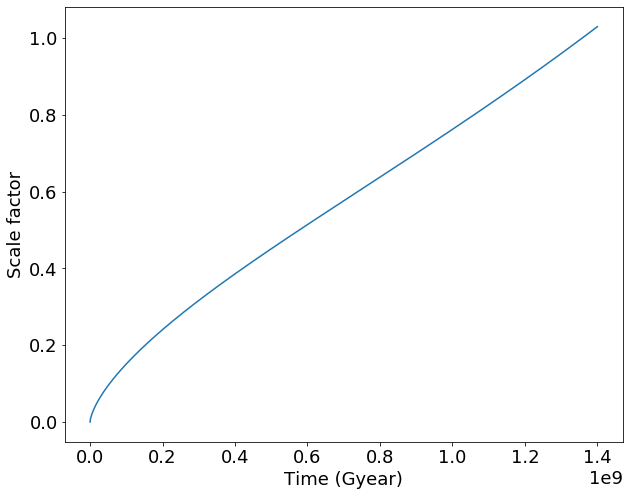

In [6]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

time=np.linspace(1e-8,14e9,50000)

#Equação acima

Friedmann= lambda  a, time, H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L : \
         a * H_0 / (Mpc2km * seg2year) *(Omega_m / a**3 + Omega_r / a**4 + Omega_L)**(1/2)

#tuple com os parâmetros comsológicos

Param=(H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L)

#Cálculo do fator de escala

scale_factor=integrate.odeint(Friedmann,1e-18,time,args=Param)

#Gráfico

plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})
fig,ax=plt.subplots()
ax.plot(time/10,scale_factor)
ax.set_xlabel('Time (Gyear)')
ax.set_ylabel('Scale factor')

## Contante de Hubble em função do redshift

A partir da primeira equação de Friedmann e substituindo o fator de escala usando a seguinte relação:

$$ a(t) = \frac{1}{1 + z} $$

A expressão para a Constante de Hubble em função do Redshift se torna:

$$ H^2 = H_0^2 \left(\Omega_m\left(1 + z\right)^3 + \Omega_r\left(1 + z\right)^4 +\Omega_\Lambda \right) $$

Text(0.5, 0, 'Redshift z')

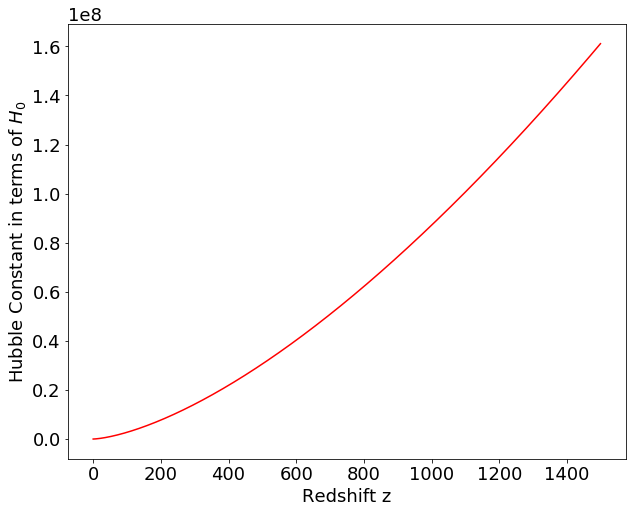

In [5]:
z = []
Hubble = []

for i in range(1500):
    z.append(i)
    H = (H_0**2)*((Omega_m)*((1+i)**3) + (Omega_r)*((1+i)**4) + (Omega_L))**0.5
    Hubble.append(H)

plt.plot(z, Hubble, 'r')
plt.ylabel('Hubble Constant in terms of $H_0$')
plt.xlabel('Redshift z')

## Evolução da densidade de energia

Para descobrir como a densidade de energia de uma dada espécie $i$ evolui com o tempo, precisamos resolver a equação do Fluido:

$$\dot{\Omega_i} + 3 H \Omega_i(1 + \omega_i)=0$$

Pois $\rho_i=\rho_{cr} \Omega_i$ e $P=\omega_i \rho_i$ (equação de Estado).

Separando os termos:

$$ \frac{d\Omega_i}{\Omega_i} = -3(1+ \omega_i)\frac{da}{a} $$

Resolvendo a equação diferencial acima,

$$ \Omega_i = \frac{\Omega_0}{a^{3(1+\omega_i)}} $$

Text(0, 0.5, 'log($\\Omega$)')

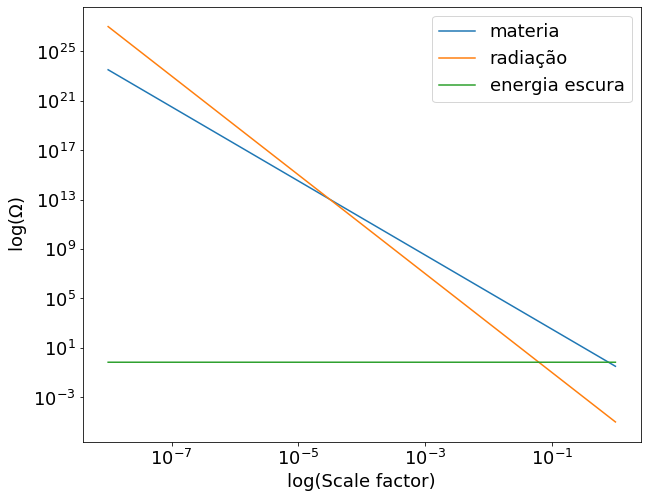

In [8]:
a=np.linspace(1e-8,1.0,1500)

materia=np.empty(len(a))
radiação=np.empty(len(a))
dark=np.empty(len(a))

for i in range (len(a)):
    materia[i]=0.320/(a[i]**(3))
    radiação[i]=1e-5/(a[i]**(4))
    dark[i]=0.680
    
fig,ax=plt.subplots()

ax.plot(a,materia,label='materia')
ax.plot(a,radiação,label='radiação')
ax.plot(a,dark,label='energia escura')
ax.legend()
plt.yscale('log')
plt.xscale('log')
ax.set_xlabel('log(Scale factor)')
ax.set_ylabel('log($\Omega$)')